# Cifar10

In this exercise we will try to create a CNN that will classify not 2 but 10 different image labels. We get the images from the dataset named [Cifar10](http://www.cs.utoronto.ca/~kriz/cifar.html)

* Import :
  * Tensorflow
  * Numpy
  * Matplotlib.pyplot

In [2]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

print (f"In Colab : {IN_COLAB}")  

In Colab : False


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.15.0'

* Using `tf.keras.utils.get_file` load the image files into your storage with this link `https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/cifar-10/train.zip`

In [2]:
# ATTENTION sur PC il sauve dans C:/content/cifar10.zip
# Bien voir le extract=True

tf.keras.utils.get_file("/content/cifar10.zip",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/cifar-10/train.zip",
                        extract=True,
                        cache_subdir="/content")

119728390/119728390 [==============================] - 6s 0us/step


'/content/cifar10.zip'

* Import the dataframe containing the labels from this link `https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/cifar-10/trainLabels.csv`

In [3]:
import pandas as pd
data = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/cifar-10/trainLabels.csv")
data.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


* Turn the `id` column into string type and add `.png` at the end of each string for the filenames to be complete

In [4]:
data["id"] = data["id"].astype("str") + ".png"
data.head()

,id,label
0,1.png,frog
1,2.png,truck
2,3.png,truck
3,4.png,deer
4,5.png,automobile


* Load and display an image of your dataset

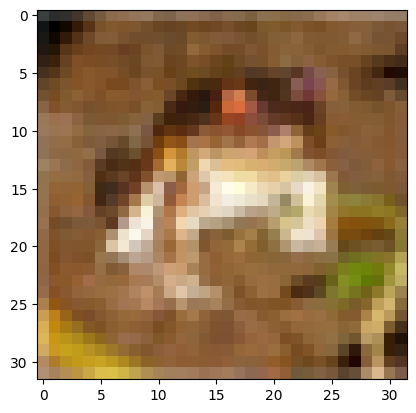

In [5]:
# ATTENTION sur PC plt.imgshow part en vrille dans un environnement où y a TF
# Marche sur la machine de Raphael
# Dans un environnement "normal" bien sûr imshow affiche correctement
# Je ne sais pas vraiment ce que retourne .image.docede_png()

img = tf.io.read_file("/content/train/1.png")
img = tf.image.decode_png(img, channels=3)
plt.imshow(img)

* View a random image of each of your labels in your dataset * View a random image of each of your labels in your dataset

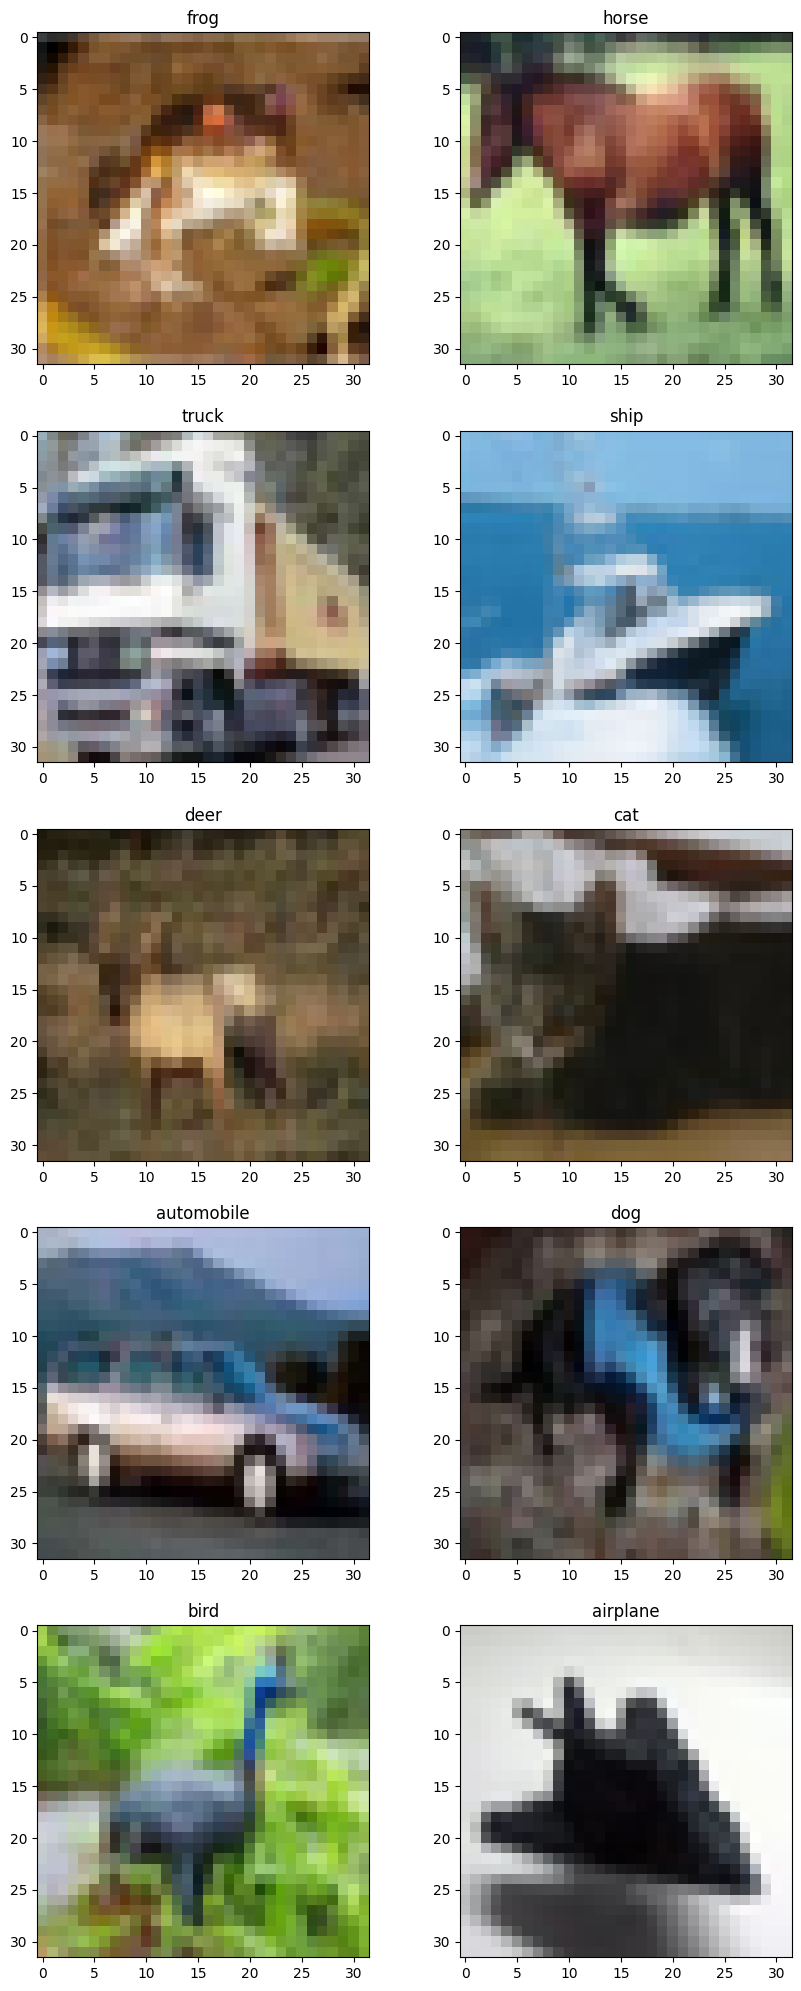

In [6]:
data_per_label = data.loc[data["label"].duplicated()==False]
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,25))
for i in range(5):
  for j in range(2):
    filename = "/content/train/" + data_per_label.iloc[i+j*5,0]
    img = tf.io.read_file(filename)
    img = tf.image.decode_png(img, channels=3)
    axes[i,j].imshow(img)
    axes[i,j].title.set_text(data_per_label.iloc[i+j*5,1])

* Define an instance of an `ImageDataGenerator` Class with the data augmentation parameters of your choice, and `validation_split=0.3` (In the correction we will use data augmentation parameters that do not force us to fill empty pixels with new values)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_generator = ImageDataGenerator(
    rotation_range=0,         # Angle range for random image rotation
    width_shift_range=0.0,    # Random shift of the image along width axis
    height_shift_range=0.0,   # Random shift of the image along height axis
    brightness_range=(0.5,1), # Random brightness modification
    shear_range=0.0,          # Random distortion of the image
    zoom_range=0.0,           # Random zoom on the image
    channel_shift_range=50.0, # Random hue modification
    horizontal_flip=True,     # Randomly flips image horizontally
    vertical_flip=True,       # Randomly flips image virtically
    rescale=1/255.,           # Rescaling values from [0,255]->[0,1]
    fill_mode='wrap',
    validation_split=0.3      # Portion of the data that can be saved for validation
)

* Set up one generator for the train data and one for the test data using the method that lets you generate data with a dataframe. Since we have many images in this dataset, we will create large batches of 64 images.
Use a target size of `(32,32)` and class_mode `"sparse"`

In [8]:
train_generator = img_generator.flow_from_dataframe(
    dataframe=data,               # the dataframe containing the filename and label column
    directory="/content/train",   # the directory containing the image files
    x_col="id",                   # the name of the column with the filenames
    y_col="label",                # the name of the column with the labels
    target_size=(32,32),
    class_mode = "sparse",
    batch_size=64,
    shuffle = True,
    subset = "training"
)

val_generator = img_generator.flow_from_dataframe(
    dataframe=data,               # the dataframe containing the filename and label column
    directory="/content/train",   # the directory containing the image files
    x_col="id",                   # the name of the column with the filenames
    y_col="label",                # the name of the column with the labels
    target_size=(32,32),
    class_mode = "sparse",
    batch_size=64,
    shuffle = True,
    subset = "validation"
)

Found 35000 validated image filenames belonging to 10 classes.
Found 15000 validated image filenames belonging to 10 classes.


* Display a batch of data of train data

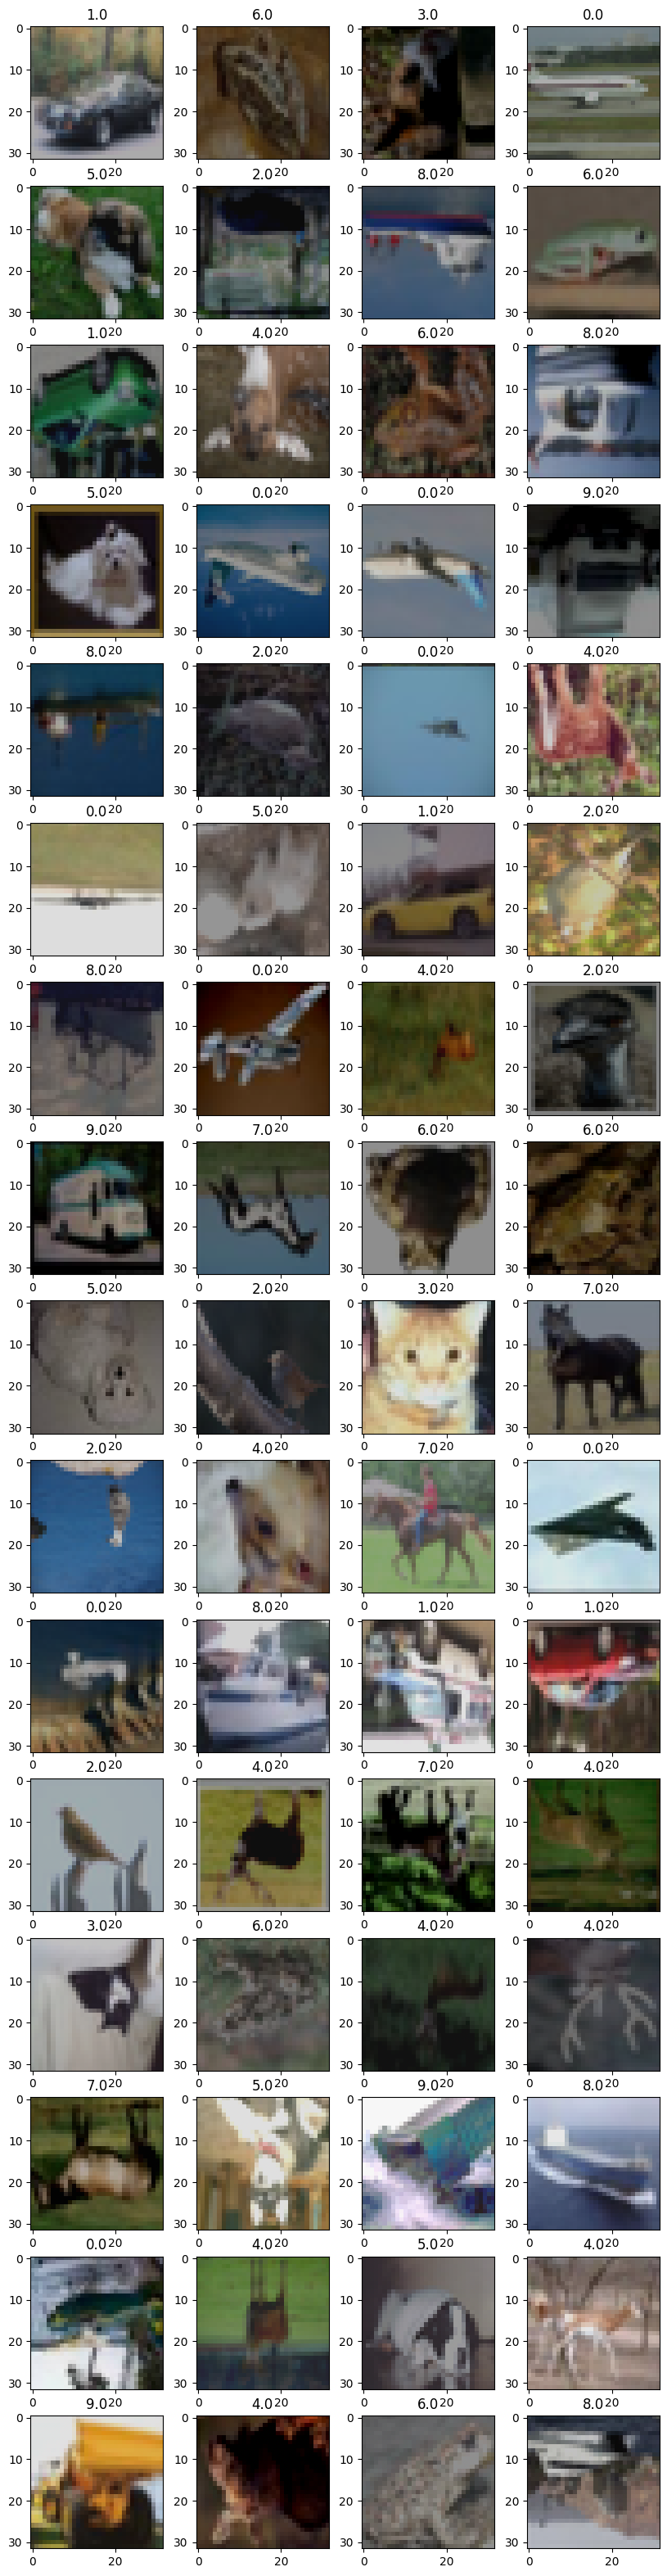

In [9]:
imgs, targets = next(iter(train_generator))
fig, ax = plt.subplots(16,4, figsize=(10,40))
for i, (img, target) in enumerate(zip(imgs, targets)):
  ax[i-16*(i//16),i//16].imshow(img)
  ax[i-16*(i//16),i//16].title.set_text(str(target))
fig.show()

* How many times can you divide the images by two along each axis until you reduce the images to single pixel?

In [20]:
import math
print(math.log2(a))


5.0


5 times!

* Build a neural network with a single convolution layer with 32 neurons, kernel size `(3,3)`, padding `"same"`, and activation `"relu"`, a max pooling layer, a flatten layer, then finish up the network with a dense layer that can predict the target variable.

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential


# Dans l'ennoncé ils disent 32 neurons en fait c'est bien 32 filtres
# Y avait pas activation='relu'
model = Sequential(
    [
     Conv2D(32, (3,3), padding="same", activation='relu', input_shape=(imgs.shape[1:])),
     MaxPool2D(),
     Flatten(),                         # this layer turns multi-dimensional images into flat objects
     Dense(10, activation="softmax")    # 10 classes
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                81930     
                                                                 
Total params: 82826 (323.54 KB)
Trainable params: 82826 (323.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Compile the model using the right loss function and metric(s) and the Adam optimizer with default learning rate

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy

model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

* Train the model over 50 epochs

In [19]:
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/50
547/547 [==============================] - 81s 147ms/step - loss: 1.8600 - sparse_categorical_accuracy: 0.3427 - val_loss: 1.7696 - val_sparse_categorical_accuracy: 0.3691
Epoch 2/50
547/547 [==============================] - 76s 139ms/step - loss: 1.6996 - sparse_categorical_accuracy: 0.4058 - val_loss: 1.6929 - val_sparse_categorical_accuracy: 0.4103
Epoch 3/50
547/547 [==============================] - 72s 131ms/step - loss: 1.6381 - sparse_categorical_accuracy: 0.4300 - val_loss: 1.6239 - val_sparse_categorical_accuracy: 0.4243
Epoch 4/50
547/547 [==============================] - 81s 149ms/step - loss: 1.5911 - sparse_categorical_accuracy: 0.4471 - val_loss: 1.5660 - val_sparse_categorical_accuracy: 0.4555
Epoch 5/50
547/547 [==============================] - 78s 142ms/step - loss: 1.5482 - sparse_categorical_accuracy: 0.4630 - val_loss: 1.5655 - val_sparse_categorical_accuracy: 0.4462
Epoch 6/50
547/547 [==============================] - 81s 147ms/step - loss: 1.5074 -

* Save the model under `cifar10model1conv.h5`

In [21]:
model.save("/content/cifar10model1conv.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* Use the following code to save the model's history (it does not get saved with the model)

In [22]:
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = model.history.history
# Save it under the form of a json file
json.dump(history_dict, open("/content/cifar10model1convhistory.json", 'w'))

# ATTENTION : utiliser la cellule ci-dessous si on veut pas attendre 3H...

In [41]:
# You may get the model's history with this code (for instructors not to have to train the whole model during the session)
# tf.keras.utils.get_file("/content/cifar10model1convhistory.json", origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model1convhistory.json")

# Load the history .json file using the following command (for instructors)
# history_dict = json.load(open("/content/cifar10model1convhistory.json", 'r'))

# Load the previously saved model using the two following commands (for instructors)
# tf.keras.utils.get_file("/content/cifar10model1conv.h5", origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model1conv.h5")

# model = tf.keras.models.load_model("/content/cifar10model1conv.h5")

* Display the evolution of the loss and the validation loss using plotly

In [42]:
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

history = history_dict
fig = go.Figure(data=[
                      go.Scatter(
                          y=history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

The model looks it starts to overfit after 30 epochs and it trains smoothly on the training data.

* Build a new model and add a new convolution layer with double the number of neurons on it followed by a max pooling, and reproduce all the same steps as before.

In [24]:
# On avait
# Conv2D(32, (3,3), padding="same", input_shape=(imgs.shape[1:])),
# MaxPool2D(),
# Flatten(),                                # this layer turns multi-dimensional images into flat objects
# Dense(10, activation="softmax")

# Y avait pas activation='relu'

model = Sequential(
    [
     Conv2D(32, (3,3), padding="same", activation='relu', input_shape=(imgs.shape[1:])),
     MaxPool2D(),
     Conv2D(64, (3,3), padding="same", activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation="softmax")
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4096)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

In [25]:
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

In [26]:
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
547/547 [==============================] - 112s 202ms/step - loss: 1.7832 - sparse_categorical_accuracy: 0.3662 - val_loss: 1.6042 - val_sparse_categorical_accuracy: 0.4276
Epoch 2/10
547/547 [==============================] - 118s 216ms/step - loss: 1.5278 - sparse_categorical_accuracy: 0.4659 - val_loss: 1.4596 - val_sparse_categorical_accuracy: 0.4933
Epoch 3/10
547/547 [==============================] - 148s 271ms/step - loss: 1.4139 - sparse_categorical_accuracy: 0.5137 - val_loss: 1.3965 - val_sparse_categorical_accuracy: 0.5149
Epoch 4/10
547/547 [==============================] - 136s 248ms/step - loss: 1.3480 - sparse_categorical_accuracy: 0.5361 - val_loss: 1.3372 - val_sparse_categorical_accuracy: 0.5428
Epoch 5/10
547/547 [==============================] - 124s 226ms/step - loss: 1.3082 - sparse_categorical_accuracy: 0.5491 - val_loss: 1.3077 - val_sparse_categorical_accuracy: 0.5494
Epoch 6/10
547/547 [==============================] - 108s 197ms/step - loss: 1.

In [27]:
model.save("/content/cifar10model2conv.h5")

import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = model.history.history
# Save it under the form of a json file
json.dump(history_dict, open("/content/cifar10model2convhistory.json", 'w'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [28]:
tf.keras.utils.get_file("/content/cifar10model2convhistory.json",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model2convhistory.json")
tf.keras.utils.get_file("/content/cifar10model2conv.h5",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model2conv.h5")
history_dict = json.load(open("/content/cifar10model2convhistory.json", 'r'))
model = tf.keras.models.load_model("/content/cifar10model2conv.h5")

In [29]:
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

history = history_dict
fig = go.Figure(data=[
                      go.Scatter(
                          y=history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

Here it seems pretty clear that just by adding a second convolutional layer in our network we are able to reach lower values of the loss function in fewer epochs, and despite the fact that our second model has much fewer parameters!

Repeat the same steps adding a third convolutional layer with `128` neurons on it, followed my a max pooling layer.

In [30]:
# On avait
#     Conv2D(32, (3,3), padding="same", input_shape=(imgs.shape[1:])),
#     MaxPool2D(),
#     Conv2D(64, (3,3), padding="same"),
#     MaxPool2D(),
#     Flatten(),
#     Dense(10, activation="softmax")

# Y avait pas activation='relu'

model = Sequential(
    [
     Conv2D(32, (3,3), padding="same", activation='relu', input_shape=(imgs.shape[1:])),
     MaxPool2D(),
     Conv2D(64, (3,3), padding="same", activation='relu'),
     MaxPool2D(),
     Conv2D(128, (3,3), padding="same", activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation="softmax")
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 128)        

In [31]:
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
547/547 [==============================] - 146s 265ms/step - loss: 1.7628 - sparse_categorical_accuracy: 0.3546 - val_loss: 1.5264 - val_sparse_categorical_accuracy: 0.4407
Epoch 2/10
547/547 [==============================] - 142s 260ms/step - loss: 1.4427 - sparse_categorical_accuracy: 0.4854 - val_loss: 1.3432 - val_sparse_categorical_accuracy: 0.5190
Epoch 3/10
547/547 [==============================] - 135s 246ms/step - loss: 1.3031 - sparse_categorical_accuracy: 0.5397 - val_loss: 1.2542 - val_sparse_categorical_accuracy: 0.5545
Epoch 4/10
547/547 [==============================] - 157s 288ms/step - loss: 1.2016 - sparse_categorical_accuracy: 0.5793 - val_loss: 1.1637 - val_sparse_categorical_accuracy: 0.5936
Epoch 5/10
547/547 [==============================] - 153s 279ms/step - loss: 1.1329 - sparse_categorical_accuracy: 0.6045 - val_loss: 1.1146 - val_sparse_categorical_accuracy: 0.6014
Epoch 6/10
547/547 [==============================] - 154s 281ms/step - loss: 1.

In [32]:
model.save("/content/cifar10model3conv.h5")

import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = model.history.history
# Save it under the form of a json file
json.dump(history_dict, open("/content/cifar10model3convhistory.json", 'w'))

In [33]:
tf.keras.utils.get_file("/content/cifar10model3convhistory.json",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model3convhistory.json")
tf.keras.utils.get_file("/content/cifar10model3conv.h5",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model3conv.h5")
history_dict = json.load(open("/content/cifar10model3convhistory.json", 'r'))
model = tf.keras.models.load_model("/content/cifar10model3conv.h5")

In [34]:
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

history = history_dict
fig = go.Figure(data=[
                      go.Scatter(
                          y=history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

* Let's build the same model and double the number of convolutional neurons on each layer.

In [35]:
# On avait
#      Conv2D(32, (3,3), padding="same", activation='relu', input_shape=(imgs.shape[1:])),
#      MaxPool2D(),
#      Conv2D(64, (3,3), padding="same", activation='relu'),
#      MaxPool2D(),
#      Conv2D(128, (3,3), padding="same", activation='relu'),
#      MaxPool2D(),
#      Flatten(),
#      Dense(10, activation="softmax")

model = Sequential(
    [
     Conv2D(64, (3,3), padding="same", activation='relu', input_shape=(imgs.shape[1:])),
     MaxPool2D(),
     Conv2D(128, (3,3), padding="same", activation='relu'),
     MaxPool2D(),
     Conv2D(256, (3,3), padding="same", activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation="softmax")
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 256)        

In [36]:
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
547/547 [==============================] - 337s 612ms/step - loss: 1.7252 - sparse_categorical_accuracy: 0.3722 - val_loss: 1.4474 - val_sparse_categorical_accuracy: 0.4794
Epoch 2/10
547/547 [==============================] - 335s 612ms/step - loss: 1.3661 - sparse_categorical_accuracy: 0.5174 - val_loss: 1.2549 - val_sparse_categorical_accuracy: 0.5575
Epoch 3/10
547/547 [==============================] - 335s 611ms/step - loss: 1.1930 - sparse_categorical_accuracy: 0.5800 - val_loss: 1.1114 - val_sparse_categorical_accuracy: 0.6053
Epoch 4/10
244/547 [============>.................] - ETA: 2:43 - loss: 1.1062 - sparse_categorical_accuracy: 0.6085

KeyboardInterrupt: 

In [ ]:
model.save("/content/cifar10model4conv.h5")

import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = model.history.history
# Save it under the form of a json file
json.dump(history_dict, open("/content/cifar10model4convhistory.json", 'w'))

In [37]:
tf.keras.utils.get_file("/content/cifar10model4convhistory.json",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model4convhistory.json")
tf.keras.utils.get_file("/content/cifar10model4conv.h5",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model4conv.h5")
history_dict = json.load(open("/content/cifar10model4convhistory.json", 'r'))
model = tf.keras.models.load_model("/content/cifar10model4conv.h5")

4983368/4983368 [==============================] - 1s 0us/step


In [38]:
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

history = history_dict
fig = go.Figure(data=[
                      go.Scatter(
                          y=history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

Increasing the number of neurons on each layer is causing the model to quickly overfit! But it trains really on the training data.

* In the time remaining, build a model by duplicating the convolutional layers before every maxpooling adn go back to the original number of neurons. Look at the model summary for reference. This last model will have 6 different convolutional layers, let's see the effect of this on the predictions

In [ ]:
# On avait

    #  Conv2D(64, (3,3), padding="same", activation='relu', input_shape=(imgs.shape[1:])),
    #  MaxPool2D(),
    #  Conv2D(128, (3,3), padding="same", activation='relu'),
    #  MaxPool2D(),
    #  Conv2D(256, (3,3), padding="same", activation='relu'),
    #  MaxPool2D(),
    #  Flatten(),
    #  Dense(10, activation="softmax")


model = Sequential(
    [
     Conv2D(32, (3,3), padding="same", activation='relu'input_shape=(imgs.shape[1:])),
     Conv2D(32, (3,3), padding="same", activation='relu'),
     MaxPool2D(),
     Conv2D(64, (3,3), padding="same", activation='relu'),
     Conv2D(64, (3,3), padding="same", activation='relu'),
     MaxPool2D(),
     Conv2D(128, (3,3), padding="same", activation='relu'),
     Conv2D(128, (3,3), padding="same", activation='relu'),
     MaxPool2D(),
     Flatten(),
     Dense(10, activation="softmax")
    ]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
model.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])
model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/50
547/547 [==============================] - 47s 85ms/step - loss: 1.8324 - sparse_categorical_accuracy: 0.3377 - val_loss: 1.3718 - val_sparse_categorical_accuracy: 0.5243
Epoch 2/50
547/547 [==============================] - 47s 85ms/step - loss: 1.3533 - sparse_categorical_accuracy: 0.5289 - val_loss: 1.2611 - val_sparse_categorical_accuracy: 0.5575
Epoch 3/50
547/547 [==============================] - 46s 84ms/step - loss: 1.2023 - sparse_categorical_accuracy: 0.5838 - val_loss: 1.1552 - val_sparse_categorical_accuracy: 0.6015
Epoch 4/50
547/547 [==============================] - 46s 85ms/step - loss: 1.1298 - sparse_categorical_accuracy: 0.6167 - val_loss: 1.1432 - val_sparse_categorical_accuracy: 0.5979
Epoch 5/50
547/547 [==============================] - 46s 84ms/step - loss: 1.0584 - sparse_categorical_accuracy: 0.6370 - val_loss: 1.1101 - val_sparse_categorical_accuracy: 0.6247
Epoch 6/50
547/547 [==============================] - 46s 84ms/step - loss: 1.0291 - spars

In [ ]:
model.save("/content/cifar10model5conv.h5")

import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = model.history.history
# Save it under the form of a json file
json.dump(history_dict, open("/content/cifar10model5convhistory.json", 'w'))

In [39]:
tf.keras.utils.get_file("/content/cifar10model5convhistory.json",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model5convhistory.json")
tf.keras.utils.get_file("/content/cifar10model5conv.h5",
                        origin="https://full-stack-assets.s3.eu-west-3.amazonaws.com/datasets/M08/CNN_models/cifar10model5conv.h5")
history_dict = json.load(open("/content/cifar10model5convhistory.json", 'r'))
model = tf.keras.models.load_model("/content/cifar10model5conv.h5")

3758264/3758264 [==============================] - 6s 2us/step


In [40]:
from plotly import graph_objects as go
color_chart = ["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]

history = history_dict
fig = go.Figure(data=[
                      go.Scatter(
                          y=history["loss"],
                          name="Training loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[0]
                          )),
                      go.Scatter(
                          y=history["val_loss"],
                          name="Validation loss",
                          mode="lines",
                          marker=dict(
                              color=color_chart[1]
                          ))
])
fig.update_layout(
    title='Training and val loss across epochs',
    xaxis_title='epochs',
    yaxis_title='Cross Entropy'
)
fig.show()

Adding more convolutional layers helps a little but does not really improve the results for this dataset.